In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

###### Q-1: Load the dataset and print the metadata in the notebook. 

In [3]:
#importing the dataset
df = pd.read_csv("kyphosis.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
#To check if dataset is imbalanced
print(df["Kyphosis"].value_counts())

absent     64
present    17
Name: Kyphosis, dtype: int64


##### Q-2 : Print a heatmap to check NULL values. 

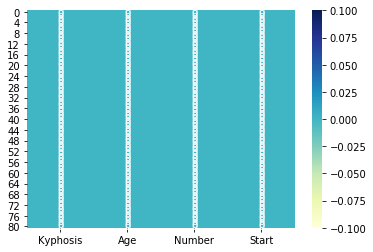

In [7]:
sns.heatmap(df.isnull(),annot=True,fmt="d",cmap='YlGnBu')

##### Q-3: Print a pairplot of the dataset. 

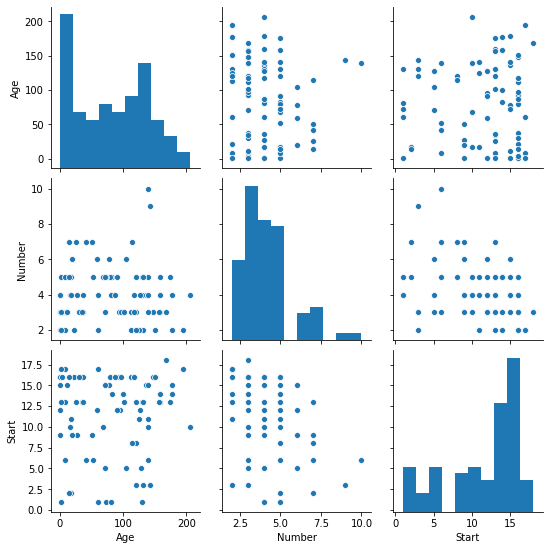

In [8]:
sns.pairplot(df)

#### Q-3: Perform splitting of train and test data. 

In [9]:

# Split the data
train, test = train_test_split(df, test_size=0.3,random_state=0)

In [10]:
X_train = train.iloc[:, 1:]
y_train = train["Kyphosis"]
X_test = test.iloc[:, 1:]
y_test = test["Kyphosis"]

#### Q-4: Perform feature scaling on independent variables 

In [11]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

#### Q-5: Build a classifier model using AdaBoost Classifier algorithm. 

In [13]:

AdaBoost = AdaBoostClassifier(n_estimators=10,learning_rate=0.75)
AdaBoost.fit(X_train, y_train)
#After performing hyperparameter tuning by varying N_estimators and learning rate best values are n_estimators=10,learning_rate=0.75


AdaBoostClassifier(learning_rate=0.75, n_estimators=10)

#### Q-6: Print classification report and plot confusion matrix. 

AdaBoostClassifier
Accuracy on training set: 0.9464
Accuracy on test set: 0.9200
Precision, Recall and fscore: 0.92 0.92 0.92


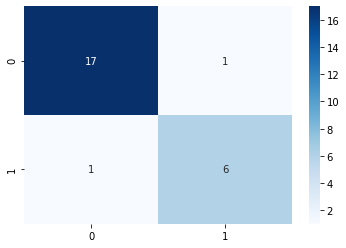

In [14]:
print("AdaBoostClassifier")
print("Accuracy on training set: {:.4f}".format(AdaBoost.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(AdaBoost.score(X_test, y_test)))

y_pred = AdaBoost.predict(X_test)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True,cmap='Blues',fmt='')